Gemini Prompts Used for project

In [ ]:
'''
1. Can you create a robust pipeline using ImageDataGenerator for preprocessing images  
2. Should I fine-tune resnet and densenet models by unfreezing some layers?  
3. What does it mean if the val acc and loss are somewhat equal or greater than train acc and loss during training  
4. .keras vs .h5 format, please tell which one is better?  
5. Should I use my trained CNN models as backbone in UNET Segmentation?  
6. I am getting model not called error when trying to use it in segmentation.  
7. Suggest a pre-trained BERT model that fits within 12GB GPU RAM for QA tasks.  
8. Should I use tflite format or directly use safetensors model file along with tokenizer?  
9. How to check if GPU is being used during HuggingFace Trainer training?  
10. Suppress Weights & Biases login prompt in HuggingFace Trainer.  
11. Save a fine-tuned BERT QA model and load it later for inference.  
12. Write Streamlit code to allow user to ask a question and get BERTs answer.  
13. How to convert BERTs answer span into human-readable text?  
14. Add fallback answers if BERT model fails to return a confident answer.  
15. Detect keywords in user questions and return prewritten default answers using Gemini.  
16. Randomly select from a list of Gemini fallback responses based on question type.  
17. How to display context-question-answer in Streamlit with markdown formatting?  
18. Generate a multi-tab Streamlit app with image classification and segmentation tabs.  
19. Load a .keras model in Streamlit for fire classification.  
21. Is there a way to modify the UI of st.radio()?  
22. Fix shape mismatch when loading a saved model trained on 224x224 but using 256x256 input.  
23. Is .safetensors BERT model better than .bin in Transformers.  
24. Generate a U-Net architecture using DenseNet121 as encoder.  
25. Train a U-Net for segmentation using masks and fire-related images.  
26. How to save a Keras segmentation model and load it later in Streamlit?  
27. Predict segmentation masks using a trained model and display in Streamlit.  
28. Add download button to export predicted segmentation masks.  
29. Implement file upload, preprocessing, and visualization for segmentation task in Streamlit.  
30. How to handle Streamlit tab switching bug that jumps to the first tab?  
31. Improve UX switch from st.radio() back to st.tabs() but maintain selected tab state.  
32. Generate a chatbot-style Q/A interface using fine-tuned BERT in Streamlit.  
33. Explain why start_idx >= end_idx may happen in BERT QA and how to fix it.  
34. Can you tell me how to apply GradCam XAI on images? As each model has different layers, how to generalize? 
'''

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/flame/train'
val_dir = '/content/drive/MyDrive/flame/val'

In [ ]:
img_size = 224
batch_sz = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    shear_range = 0.15,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
val_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_size,img_size),
    batch_size = batch_sz,
    class_mode = 'binary'
)

Found 3000 images belonging to 2 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_size,img_size),
    batch_size = batch_sz,
    class_mode = 'binary'
)

Found 800 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

ResNet50

In [ ]:
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (img_size,img_size,3))
base_model.trainable = False

In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128,activation = 'relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
checkpoint_model = ModelCheckpoint('resnet50_wildfire_model.keras', save_best_only = True)

In [ ]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 3,
    callbacks = [checkpoint_model]
)

Epoch 1/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 799s 8s/step - accuracy: 0.7781 - loss: 0.4300 - val_accuracy: 0.7775 - val_loss: 0.5339
Epoch 2/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 52s 551ms/step - accuracy: 0.9067 - loss: 0.2552 - val_accuracy: 0.7837 - val_loss: 0.5838
Epoch 3/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 52s 555ms/step - accuracy: 0.9067 - loss: 0.2342 - val_accuracy: 0.7837 - val_loss: 0.5052


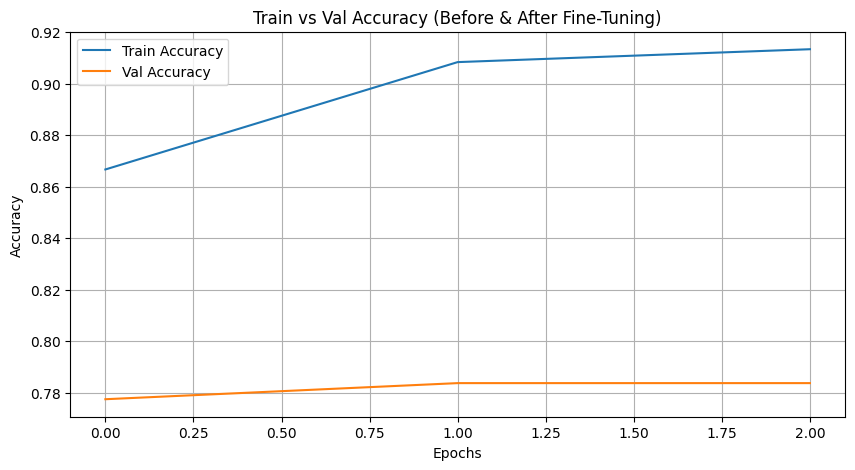

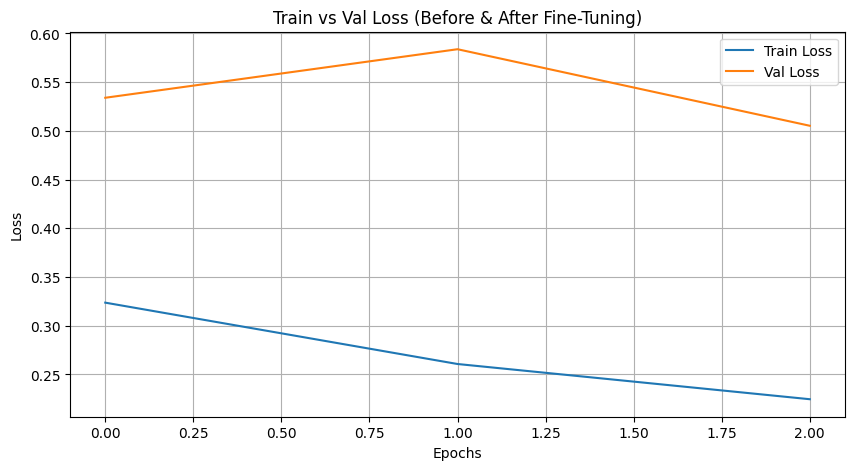

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Train vs Val Accuracy (Before & After Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Train vs Val Loss (Before & After Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.save('resnet50_wildfire_final_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('resnet50_wildfire_final_model.keras')

In [ ]:
resnet_base = model.layers[0]
resnet_base.trainable = True

In [ ]:
for layer in resnet_base.layers[:-30]:
  layer.trainable = False

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5),
              loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history_finetune = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 3,
    callbacks = [ModelCheckpoint('resnet50_finetuned.keras',save_best_only = True)]
)

Epoch 1/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 86s 697ms/step - accuracy: 0.9101 - loss: 0.2411 - val_accuracy: 0.7950 - val_loss: 0.6518
Epoch 2/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 61s 561ms/step - accuracy: 0.9584 - loss: 0.1299 - val_accuracy: 0.5512 - val_loss: 0.7674
Epoch 3/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 54s 579ms/step - accuracy: 0.9665 - loss: 0.0986 - val_accuracy: 0.9250 - val_loss: 0.2257


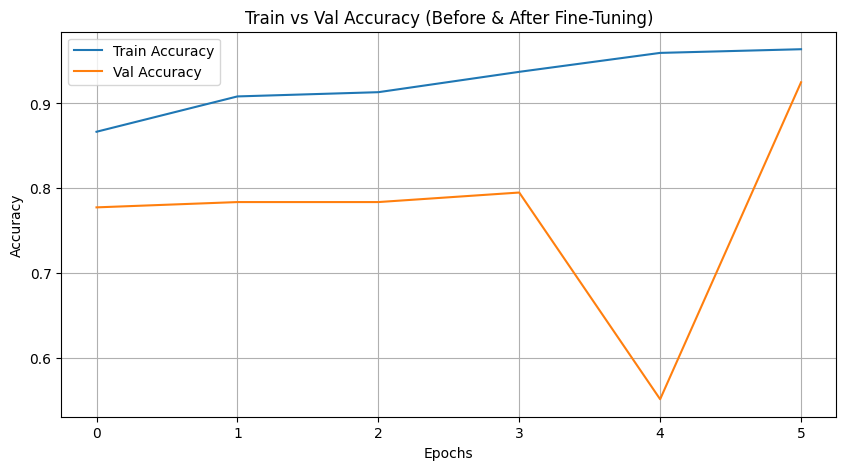

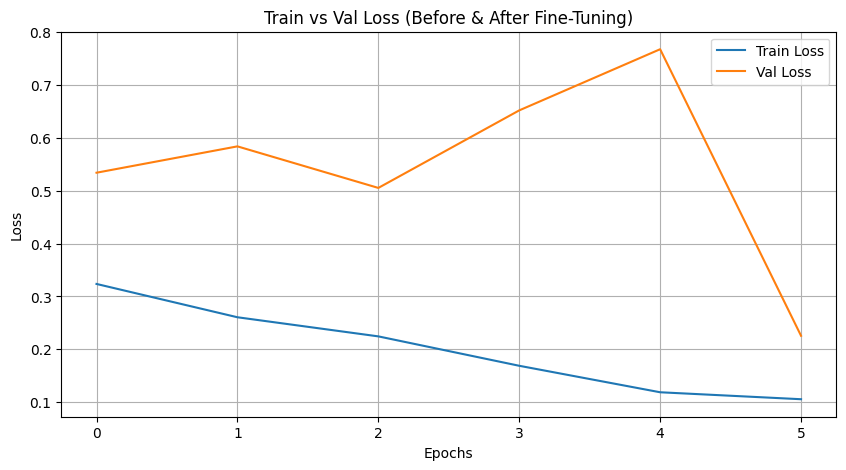

In [ ]:
def combine_history(h1, h2):
    history_combined = {}
    for key in h1.history.keys():
        history_combined[key] = h1.history[key] + h2.history[key]
    return history_combined

combined_history = combine_history(history, history_finetune)

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(combined_history['accuracy'], label='Train Accuracy')
plt.plot(combined_history['val_accuracy'], label='Val Accuracy')
plt.title('Train vs Val Accuracy (Before & After Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(combined_history['loss'], label='Train Loss')
plt.plot(combined_history['val_loss'], label='Val Loss')
plt.title('Train vs Val Loss (Before & After Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.save('resnet50_finetuned_model.keras')

DenseNet

In [ ]:
from tensorflow.keras.applications import DenseNet121

In [ ]:
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))
base_model.trainable = False

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_cb = ModelCheckpoint('densenet_fire_classifier.keras', save_best_only=True)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3,
    callbacks=[checkpoint_cb]
)

Epoch 1/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 106s 826ms/step - accuracy: 0.9246 - loss: 0.2207 - val_accuracy: 0.8725 - val_loss: 0.3347
Epoch 2/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 54s 570ms/step - accuracy: 0.9559 - loss: 0.1151 - val_accuracy: 0.9187 - val_loss: 0.2005
Epoch 3/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 53s 562ms/step - accuracy: 0.9655 - loss: 0.0914 - val_accuracy: 0.9000 - val_loss: 0.2771


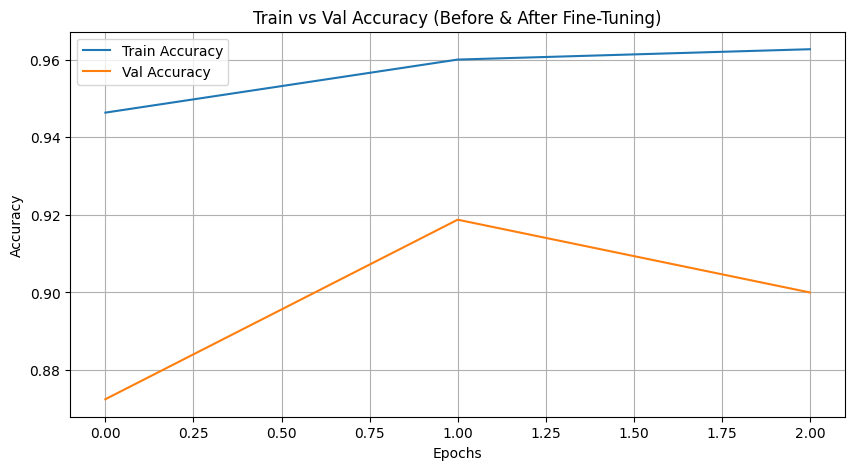

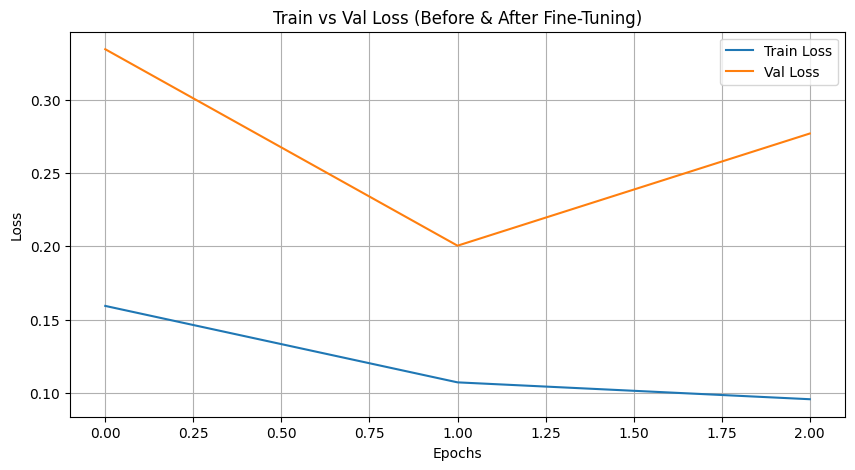

In [ ]:
#plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Train vs Val Accuracy (Before & After Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Train vs Val Loss (Before & After Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model = load_model('densenet_fire_classifier.keras')

In [ ]:
densenet_base = model.layers[0]
densenet_base.trainable = True

In [ ]:
for layer in densenet_base.layers[:-30]:
  layer.trainable = False

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5),
              loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,168,833 (27.35 MB)

 Trainable params: 772,737 (2.95 MB)

 Non-trainable params: 6,396,096 (24.40 MB)

In [ ]:
history_finetune = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 3,
    callbacks = [ModelCheckpoint('densenet_finetuned.keras',save_best_only = True)]
)

Epoch 1/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 111s 821ms/step - accuracy: 0.6530 - loss: 1.0234 - val_accuracy: 0.9275 - val_loss: 0.1891
Epoch 2/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 52s 550ms/step - accuracy: 0.9033 - loss: 0.2507 - val_accuracy: 0.9350 - val_loss: 0.1898
Epoch 3/3
94/94 ━━━━━━━━━━━━━━━━━━━━ 53s 562ms/step - accuracy: 0.9484 - loss: 0.1368 - val_accuracy: 0.9350 - val_loss: 0.1832


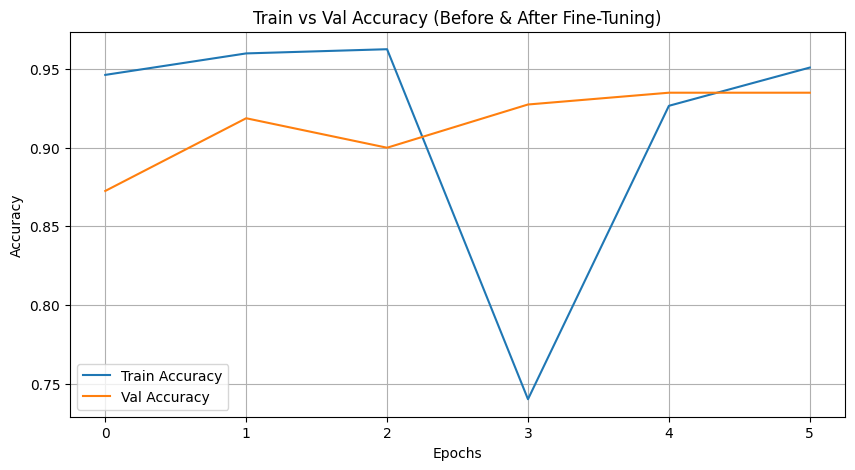

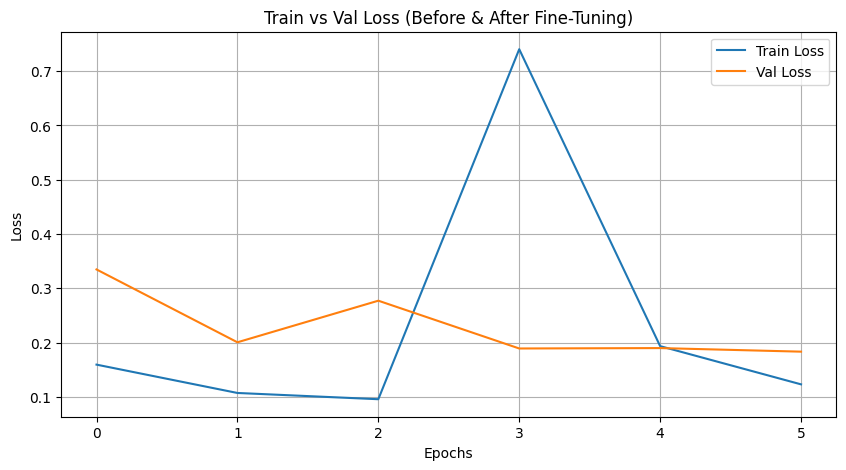

In [ ]:
def combine_history(h1, h2):
    history_combined = {}
    for key in h1.history.keys():
        history_combined[key] = h1.history[key] + h2.history[key]
    return history_combined

combined_history = combine_history(history, history_finetune)

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(combined_history['accuracy'], label='Train Accuracy')
plt.plot(combined_history['val_accuracy'], label='Val Accuracy')
plt.title('Train vs Val Accuracy (Before & After Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(combined_history['loss'], label='Train Loss')
plt.plot(combined_history['val_loss'], label='Val Loss')
plt.title('Train vs Val Loss (Before & After Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

CNN From Scratch (Custom CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,361 (1.61 MB)

 Trainable params: 422,401 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
checkpoint_cb = ModelCheckpoint(
    'custom_cnn_fire_classifier.keras',
    save_best_only=True,
    monitor='val_loss'
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint_cb]
)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 72s 624ms/step - accuracy: 0.8572 - loss: 0.4034 - val_accuracy: 0.5000 - val_loss: 1.3379
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 53s 568ms/step - accuracy: 0.9348 - loss: 0.1803 - val_accuracy: 0.5000 - val_loss: 1.7410
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 52s 556ms/step - accuracy: 0.9391 - loss: 0.1719 - val_accuracy: 0.5100 - val_loss: 0.9735
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 52s 549ms/step - accuracy: 0.9517 - loss: 0.1318 - val_accuracy: 0.7800 - val_loss: 0.4342
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 51s 546ms/step - accuracy: 0.9472 - loss: 0.1548 - val_accuracy: 0.8313 - val_loss: 0.4115
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 83s 554ms/step - accuracy: 0.9467 - loss: 0.1404 - val_accuracy: 0.8275 - val_loss: 0.3737
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 52s 556ms/step - accuracy: 0.9524 - loss: 0.1398 - val_accuracy: 0.9025 - val_loss: 0.2778
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 53s 569ms/step - accuracy: 0.9520 - loss: 0.1377 - val_accu

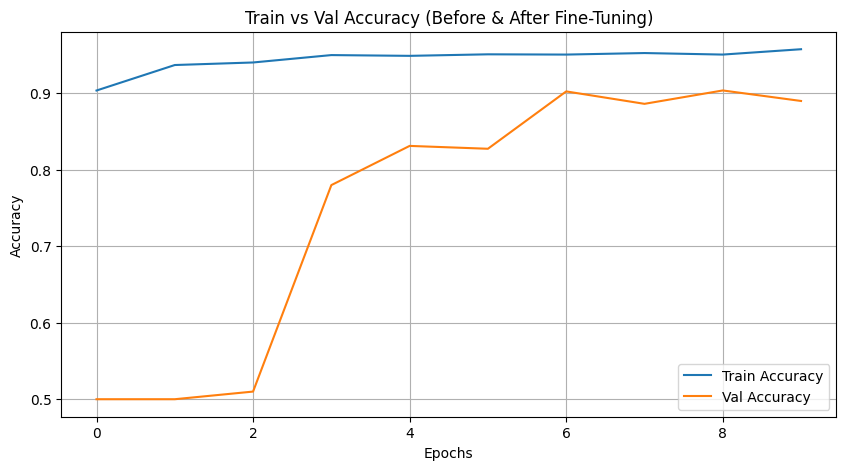

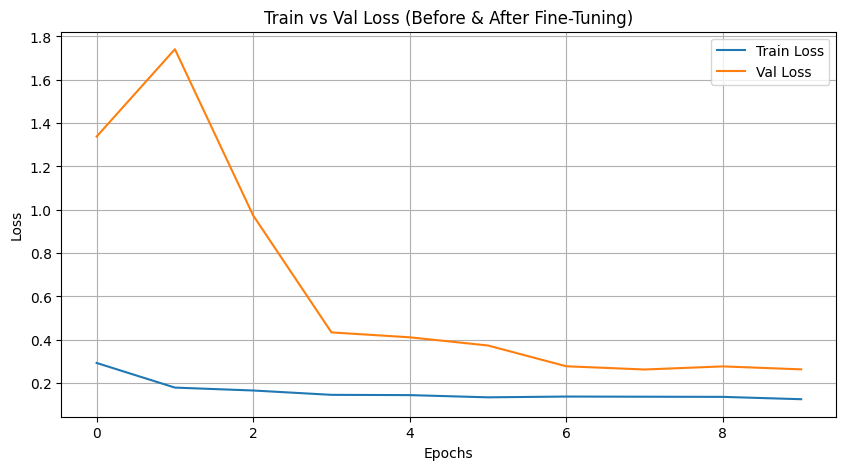

In [ ]:
# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Train vs Val Accuracy (Before & After Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Train vs Val Loss (Before & After Fine-Tuning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Fire Segmentation U-Net

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.applications import DenseNet121
from sklearn.model_selection import train_test_split

In [3]:
Image_Size = (256,256)
Batch_Size = 8
Epochs = 10

In [4]:
def load_data(image_dir, mask_dir, size = (256,256)):
  image_paths = sorted(glob(os.path.join(image_dir, '*')))
  mask_paths = sorted(glob(os.path.join(mask_dir, '*')))
  X, Y = [], []
  for img_path in image_paths:
    filename = os.path.basename(img_path)
    mask_path = os.path.join(mask_dir, filename)
    if not os.path.exists(mask_path):
      continue

    img = cv2.imread(img_path)
    img = cv2.resize(img, size)
    img = img/255.0
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, size)
    mask = np.expand_dims(mask, axis = -1)
    mask = mask/255.0
    X.append(img)
    Y.append(mask)
  return np.array(X), np.array(Y)

In [5]:
def Build_UNet(input_shape = (256,256,3)):
  base_model = DenseNet121(weights = 'imagenet', include_top = False, input_shape = input_shape)
  base_model.trainable = False

  skips = [
      base_model.get_layer('conv1_relu').output,
      base_model.get_layer('pool2_pool').output,
      base_model.get_layer('pool3_pool').output,
      base_model.get_layer('pool4_pool').output,
  ]
  encoder_output = base_model.output

  x = encoder_output
  for i,skip in zip([512,256,128,64], reversed(skips)):
    x = layers.Conv2DTranspose(i, 3, strides = 2, padding = 'same', activation = 'relu')(x)
    if x.shape[1] != skip.shape[1] or x.shape[2] != skip.shape[2]:
      skip = layers.Conv2D(i, 1, padding='same')(skip)
      skip = layers.UpSampling2D(size=(x.shape[1]//skip.shape[1], x.shape[2]//skip.shape[2]))(skip)
    x = layers.Concatenate()([x,skip])
    x = layers.Conv2D(i, 3, padding = 'same', activation = 'relu')(x)
  x = layers.Conv2DTranspose(32, 3, strides = 2, padding = 'same', activation = 'relu')(x)
  outputs = layers.Conv2D(1, 1, activation = 'sigmoid')(x)

  model = models.Model(inputs = base_model.input, outputs = outputs)
  return model

In [6]:
fire_path = '/content/drive/MyDrive/segmentation/fire_segment_data/fire'
mask_path = '/content/drive/MyDrive/segmentation/fire_segment_data/mask'

In [7]:
X, Y = load_data(fire_path, mask_path,size = Image_Size)
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size = 0.2, random_state =42)

In [8]:
model = Build_UNet(input_shape = (256,256,3))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 64, 64,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 64, 64,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 64, 64,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 64, 64,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 64, 64,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 64, 64,    │     12,288 │ conv2_block2_0_r

 Total params: 19,936,641 (76.05 MB)

 Trainable params: 12,899,137 (49.21 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint(
    filepath= 'unet_segmentation.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [11]:
history = model.fit(
    X_train, Y_train,
    validation_data = (X_val, Y_val),
    batch_size = Batch_Size,
    epochs = 10,
    callbacks=[checkpoint]
)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.9762 - loss: 0.1389
Epoch 1: val_loss improved from inf to 0.02650, saving model to unet_segmentation.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 101s 471ms/step - accuracy: 0.9762 - loss: 0.1383 - val_accuracy: 0.9823 - val_loss: 0.0265
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9826 - loss: 0.0255
Epoch 2: val_loss improved from 0.02650 to 0.02119, saving model to unet_segmentation.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 17s 141ms/step - accuracy: 0.9826 - loss: 0.0255 - val_accuracy: 0.9839 - val_loss: 0.0212
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9836 - loss: 0.0213
Epoch 3: val_loss improved from 0.02119 to 0.01869, saving model to unet_segmentation.keras
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - accuracy: 0.9836 - loss: 0.0213 - val_accuracy: 0.9845 - val_loss: 0.0187
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9847 - loss: 0.0182
Epoch 4: val_lo

Text(0.5, 1.0, 'Accuracy')

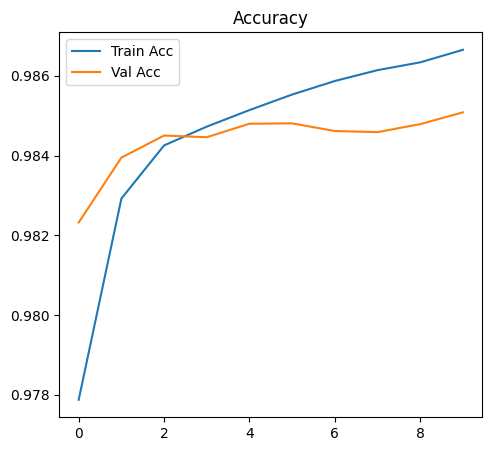

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")

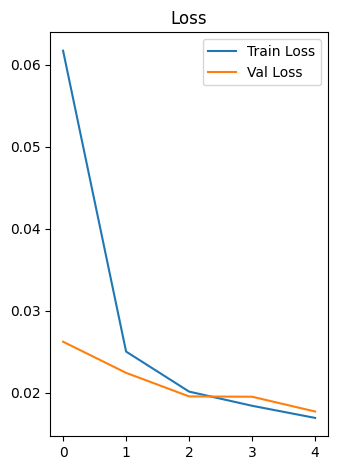

In [42]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")
plt.tight_layout()
plt.show()